# Plantilla de Definición de Proyecto GRD

Complete claramente cada sección en grupo, proporcionando justificaciones detalladas y coherentes con los objetivos del curso y el contexto del sistema de salud chileno (GRD).

## 1. Integrantes del grupo


- Estudiante 1: Vicente Fuentes (Experto en analisis estadistico)
- Estudiante 2: Darienn López (Experto en crear visualizaciones de datos)
- Estudiante 3: Tomás Solano (Experto en programación)

## 2. Título tentativo del proyecto

#### Las consecuecias de la centralización de la salud chilena y como afecta a su calidad demográficamente.

## 3. Declaración del problema desde el usuario

La población chilena necesita tener salud de calidad al alcance de su región debido a que gran parte de los implementos y profesionales de alta calidad se encuentran en la región metropolitana, lo que provoca que la gente deba hacer viajes costosos a esta.


## 4. Pregunta principal de investigación

¿Cómo afecta la centralización de la salud a la población chilena?

## 5. Preguntas secundarias (mínimo 2)

- Pregunta secundaria 1: ¿Cómo varia el tiempo de estancia entre la región metropolitana y el resto de regiones?
- Pregunta secundaria 2: ¿Cómo afecta la centralización en la calidad de los centros de salud con respecto a la mortalidad?
- (Opcional) Pregunta secundaria 3: ¿El peso GRD es varia dependiendo de la localidad del centro de salud?

## 6. Variables principales y justificación de selección

Variable 1: Servicios de Salud - Justificación: Analizaremos los datos según la región, por lo que este dato es clave.

Variable 2: Mortalidad - Justificación: Conocer la mortalidad según el centro de salud es clave para un correcto análisis.

Variable 3: Peso GRD - Justificación: Podemos analizar variables que sean iguales en diversos centros de salud para realizar comparativas en el estudio.

Variable 4: Tiempo Estancia - Justificación: Nos dirá como varian los tiempos de recuperación de un paciente promedio en un mismo GRD en distintos servicios de salud.


## 7. Metodología estadística propuesta

- Método 1: Estadística Descriptiva - Propósito: Analizar y comparar la calidad y eficiencia de los distintos centros de salud en el país, permitiendo distribuir los datos en categorías y entregar información relevante y de calidad.
- Método 2: Estadística Inferencial - Propósito: El estudio que estamos realizando nos entregará muchos datos, los cuales deben de ser analizados con detenimiento para poder obtener conclusiones acordes al caso, tendiendo en cuenta la situación actual de las regiones.

## 8. Potencial impacto y aplicación práctica

Nuestra investigación hará visible la situación actual y la brecha de calidad de atención en las regiones de Chile, ya que la situación implica un gran gasto por la población chilena para tener una atención de salud de buena calidad. También, entregará información importante que permita tomar acciones ante esta situación y hacer las atenciones de salud de calidad accesibles para la población chilena a lo largo de todas las regiones del país.

## 9. Supuestos estadísticos necesarios

Supuesto 1: Los códigos GRDs son únicos e iguales para todos los servicios - Forma de validación: Está dirigido por una norma.

Supuesto 2: La población, y por ende, las muestras obtenibles de la región metropolitana son más que las muestras disponibles por región - Forma de validación: Población por región de estudio.

## 10. Limitaciones del estudio

Limitación 1: Dificultad de obtención de información de ciertos grupos, como son los hombres de 20 a 50 años, los cuales tienden a omitir la atención médica - Estrategia de mitigación: Se buscará una distribución que se adapte a los datos actuales para inferir y predecir el comportamiento de estos grupos.

Limitación 2: Los servicios de salud en otras regiones se generalizan por región, mientras que en la región metropolitana existen por distrito - Estrategia de mitigación: Obtener un promedio para la región metropolitana con el fin de obtener una generalización de la misma.

## 11. Cronograma detallado del proyecto
Defina claramente las actividades que realizarán en cada bloque de semanas según el calendario del curso.
- Semanas 4-5: Análisis inicial y filtración de datos.
- Semanas 6-7: Revisión de datos obtenidos y creación visualizaciones iniciales.
- Semanas 8-9: Obtención de conclusiones del estudio y comienzo de la escritura del informe.
- Semanas 10-11: Revisión de las conclusiones y finalización del informe.
- Semana 12 (preparación final): Creación de la presentación de los datos y análisis para el exámen.

In [4]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
archivo_csv = "GRD_PUBLICO_2023.csv"
df = pd.read_csv(archivo_csv, sep='|', on_bad_lines='skip', engine='python', encoding='utf-16')
print(f"Datos cargados exitosamente: {df.shape[0]:,} registros")
display(df.head(5))

Datos cargados exitosamente: 1,039,587 registros


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,ETNIA,PROVINCIA,COMUNA,NACIONALIDAD,PREVISION,SERVICIO_SALUD,...,FECHAPROCEDIMIENTO1,FECHAINTERV1,ESPECIALIDADINTERVENCION,MEDICOALTA_ENCRIPTADO,USOSPABELLON,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,HOSPPROCEDENCIA
0,122100,72196813,HOMBRE,1980-04-13,OTRO,VALDIVIA,PANGUIPULLI,CHILE,FONASA INSTITUCIONAL - (MAI) A,VALDIVIA,...,NaN,NaN,NaN,87553213,NaN,064161,"0,7094",1,1,NaN
1,114101,DESCONOCIDO,HOMBRE,2001-11-04,OTRO,CORDILLERA,PUENTE ALTO,VENEZUELA (REPÚBLICA BOLIVARIANA DE),PARTICULAR,METROPOLITANO SURORIENTE,...,NaN,NaN,NaN,86895434,1.0,041301,"1,0869",1,1,NaN
2,114101,97627974,HOMBRE,2020-07-30,OTRO,CORDILLERA,PUENTE ALTO,CHILE,FONASA INSTITUCIONAL - (MAI) A,METROPOLITANO SURORIENTE,...,NaN,NaN,NaN,73227424,NaN,044161,"0,4084",1,1,NaN
3,106103,67770674,MUJER,1978-11-14,OTRO,SAN ANTONIO,SAN ANTONIO,CHILE,FONASA INSTITUCIONAL - (MAI) C,VALPARAISO SAN ANTONIO,...,NaN,25-05-2023,OBSTETRICIA Y GINECOLOGÍA,71695588,1.0,131301,"0,6406",1,1,NaN
4,106103,100390800,MUJER,2023-12-20,OTRO,SAN ANTONIO,SAN ANTONIO,CHILE,FONASA INSTITUCIONAL - (MAI) B,VALPARAISO SAN ANTONIO,...,NaN,NaN,NaN,71644222,NaN,074131,"0,5346",1,1,NaN


In [11]:

valores = list(df["SERVICIO_SALUD"].unique())
valores

diccionario = {}
for i in valores:
    if "METROPOLITANO" in i:
        diccionario[i] = "METROPOLITANO"
    else:
        diccionario[i] = i
        
diccionario

df["SERVICIO_SALUD"] = df["SERVICIO_SALUD"].map(diccionario)
df = df[(df["SERVICIO_SALUD"] != "DESCONOCIDO") & (df["IR_29301_PESO"] != "DESCONOCIDO")]

In [7]:
regiones = list(df["SERVICIO_SALUD"].unique())
regiones

['VALDIVIA',
 'METROPOLITANO',
 'VALPARAISO SAN ANTONIO',
 'ACONCAGUA',
 'COQUIMBO',
 'DEL RELONCAVÍ',
 'DEL MAULE',
 'LIBERTADOR B. O HIGGINS',
 'VIÑA DEL MAR QUILLOTA',
 'ARAUCANÍA SUR',
 'ARAUCANÍA NORTE',
 'TALCAHUANO',
 'IQUIQUE',
 'OSORNO',
 'ANTOFAGASTA',
 'CONCEPCIÓN',
 'ARICA',
 'ÑUBLE',
 'ATACAMA',
 'AYSEN',
 'BIOBIO',
 'ARAUCO',
 'CHILOÉ',
 'MAGALLANES']

### 1.2. Limpieza: Convierte $,$ a $.$

In [13]:
def Convert_To_Point(data):
    new_data = []
    for num in data:
        new_num = []
        for char in num:
            new_num.append(char) if char != "," else new_num.append(".")
        
        new_data.append(float(''.join(new_num)))

    return new_data

df["IR_29301_PESO"] = Convert_To_Point(df["IR_29301_PESO"])    

In [14]:
datos = []

confianza = 0.95

for i in regiones:
    dato_region = df[df["SERVICIO_SALUD"] == i]
    
    peso_grd = dato_region["IR_29301_PESO"]
    promedio = np.mean(peso_grd)
    desv_est = np.std(peso_grd)
    
    grados_libertad = len(peso_grd) - 1
    
    err_est_muestral = desv_est/np.sqrt(len(peso_grd))
    
    lim_inf, lim_sup = scipy.stats.t.interval(confianza, grados_libertad, promedio, err_est_muestral)
    
    datos.append({
        "REGION" : i,
        "PROMEDIO PESO_GRD" : promedio,
        "DESV ESTANDAR PESO_GRD" : desv_est,
        "INTERVALO CONFIANZA INF" : lim_inf,
        "INTERVALO CONFIANZA SUP" : lim_sup
    })
    
calculos = pd.DataFrame(datos)

calculos = calculos.sort_values(by = "PROMEDIO PESO_GRD", ascending=False)
calculos = calculos.reset_index().drop("index", axis = "columns")

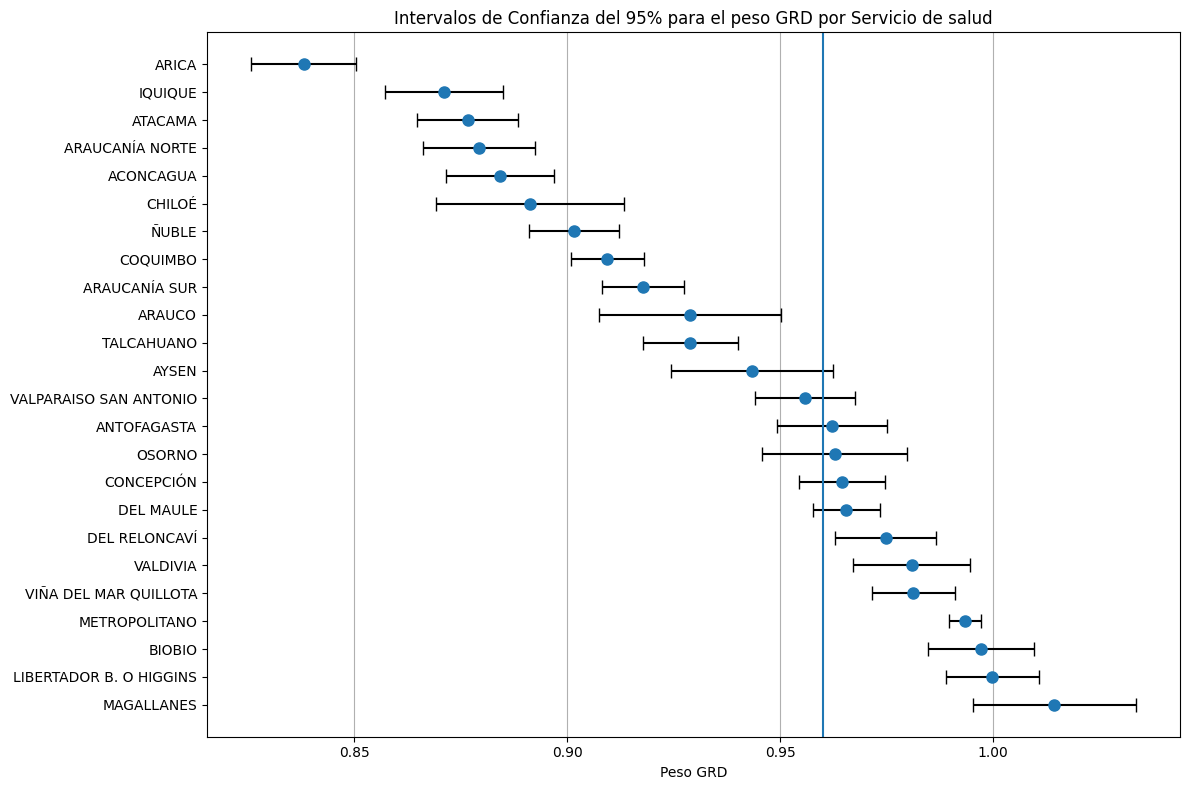

0.9601373654946161


In [ ]:
promedio = np.mean(df["IR_29301_PESO"])

plt.figure(figsize=(12, 8))

plt.errorbar(
    calculos['PROMEDIO PESO_GRD'], calculos.index,
    xerr=[calculos['PROMEDIO PESO_GRD'] - calculos['INTERVALO CONFIANZA INF'], calculos['INTERVALO CONFIANZA SUP'] - calculos['PROMEDIO PESO_GRD']],
    fmt='o', capsize=5, capthick=1, ecolor='black', markersize=8
)

plt.yticks(calculos.index, calculos['REGION'])
plt.xlabel('Peso GRD')
plt.axvline(x = promedio)
plt.title('Intervalos de Confianza del 95% para el peso GRD por Servicio de salud')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

print(f"El promedio grd es: {promedio}")